In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 


In [2]:
# Reading the data
train = pd.read_csv(r"C:\Users\naras\OneDrive\Documents\Desktop\Identifying Age Group of Actor\Dataset\agedetectiontrain\train.csv")
test = pd.read_csv(r"C:\Users\naras\OneDrive\Documents\Desktop\Identifying Age Group of Actor\Dataset\agedetectiontest\test.csv")


Age group: MIDDLE


C:\Users\naras\AppData\Local\Temp\ipykernel_18820\3605067315.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join(r"C:\Users\naras\OneDrive\Documents\Desktop\Identifying Age Group of Actor\Dataset\agedetectiontrain\Train", img_name))


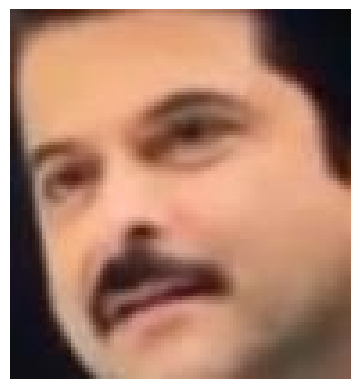

In [3]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join(r"C:\Users\naras\OneDrive\Documents\Desktop\Identifying Age Group of Actor\Dataset\agedetectiontrain\Train", img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()


In [4]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(r"C:\Users\naras\OneDrive\Documents\Desktop\Identifying Age Group of Actor\Dataset\agedetectiontrain\Train", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
train_x = np.stack(temp)


C:\Users\naras\AppData\Local\Temp\ipykernel_18820\3344972891.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [5]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(r"C:\Users\naras\OneDrive\Documents\Desktop\Identifying Age Group of Actor\Dataset\agedetectiontest\Test", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
test_x = np.stack(temp)


C:\Users\naras\AppData\Local\Temp\ipykernel_18820\1601507500.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [6]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.


In [8]:

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train['Class'])  # Ensure 'Class' is referenced as a column from the DataFrame
train_y = to_categorical(train_y)


In [15]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 50
batch_size = 128


In [16]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])


In [17]:
# Printing model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │       1,536,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5523 - loss: 0.9264
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6040 - loss: 0.8459
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6159 - loss: 0.8274
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6213 - loss: 0.8162
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6295 - loss: 0.8028
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6269 - loss: 0.8008
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6358 - loss: 0.7985
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6374 - loss: 0.7879
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6459 - loss: 0.7779
Epoch 10/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6558 - loss: 0.7687
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6500 - loss: 0.7694
Epoch 12/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13m

In [20]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7167 - loss: 0.6571 - val_accuracy: 0.7330 - val_loss: 0.6370
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7160 - loss: 0.6556 - val_accuracy: 0.6966 - val_loss: 0.6687
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7221 - loss: 0.6510 - val_accuracy: 0.7353 - val_loss: 0.6346
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7304 - loss: 0.6441 - val_accuracy: 0.7212 - val_loss: 0.6584
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7210 - loss: 0.6467 - val_accuracy: 0.7298 - val_loss: 0.6537
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7241 - loss: 0.6413 - val_accuracy: 0.7381 - val_loss: 0.6343
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7253 - loss: 0.6444 - val_accuracy: 0.6532 - val_loss: 0.7704
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7242 - loss: 0.6459 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


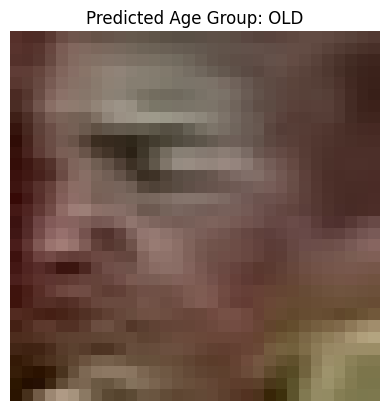

Predicted Age Group: OLD


In [29]:
import random

# Randomly selecting an image from the test set
random_idx = random.randint(0, len(test_x) - 1)
random_image = test_x[random_idx]

# Reshape the image for prediction (add batch dimension)
random_image_reshaped = random_image.reshape(1, 32, 32, 3)

# Predicting the class of the selected image
prediction = model.predict(random_image_reshaped)
predicted_class = np.argmax(prediction, axis=1)

# Decoding the predicted class to its original label
predicted_age_group = lb.inverse_transform(predicted_class)

# Display the image along with the predicted class
plt.imshow(random_image)
plt.axis('off')
plt.title(f"Predicted Age Group: {predicted_age_group[0]}")
plt.show()

# Print the prediction
print(f"Predicted Age Group: {predicted_age_group[0]}")
